In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here:

- Name 1: Ahmet Ata Ersoy
- Name 2: Cagatay Duygu


___

# In Class Assignment Three
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [3]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 1.1.2


In [4]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = np.array(ds.target != b'normal.')
y = y.astype(np.int)

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


C:\Users\48369962\AppData\Local\Temp\ipykernel_22768\3391815282.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of instances in each of the classes.**

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#=== Fill in code below========
print('Number of instances in each class:','??')
# you might be interested in the functions:
#     np.bincount
#     plt.hist


Number of instances in each class: ??


In [6]:
np.unique(y)

array([0, 1])

In [12]:
y1=y[y==1]
y1_instance=y1.shape
print("Number of instances for class 0:", y1_instance[0])

Number of instances for class 0: 2209


In [11]:
y0=y[y==0]
y0_instance=y0.shape
print("Number of instances for class 0:", y0_instance[0])

Number of instances for class 0: 56516


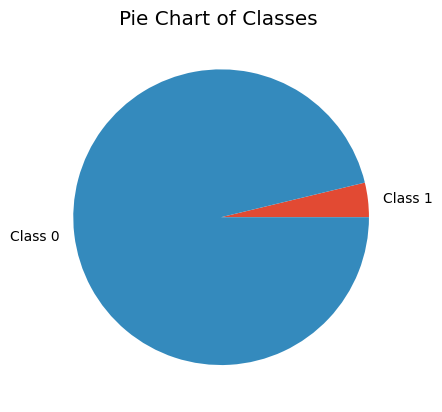

In [14]:
classes=np.array([y1_instance[0], y0_instance[0]])
mylabels=["Class 1","Class 0"]

plt.pie(classes, labels = mylabels)
plt.title("Pie Chart of Classes ")
plt.show() 


<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation

(0.9894891008174387, 1.0)

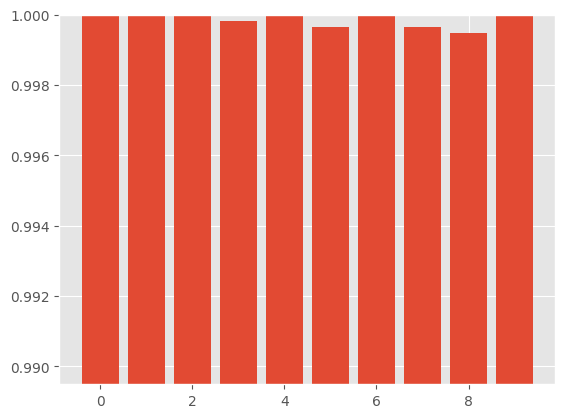

In [15]:
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset (i.e., using KFold)? Why or why not? 



No, because our data has mostly Class:0s (normal logins) and as when training KFold doesn't take this into account and as we are more concerned with training the model to distinguish Class:1s (less abundant), this method is not the best applicable. 

And the code above uses overall accuracy which is not applicable for this case. Because, we have imbalance in data abundance in between the classes. 
___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset (i.e., using accuracy)? Why or Why not?



No, we should be looking at measure the recall performance to lower false negatives. Accuracy is just a metric that measures for overall data. In this case, we need to be more coutious about false negatives. We can't get away with false negatives but rather we are more okay to have false positives. Our objective is to distinguish possible attacks, not to increase overall accuracy. 
___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). **Mark changes in the code with comments.**

* We choose to use StratifiedKFold as we have huge imbalance in our dataset. This method splits training sets preserving the ratio of the classes in whole data for each set.
* StratifiedShuffleSplit could have also been used as it also preserves the ratio of data of training set. 


(0.9719004524886877, 1.0)

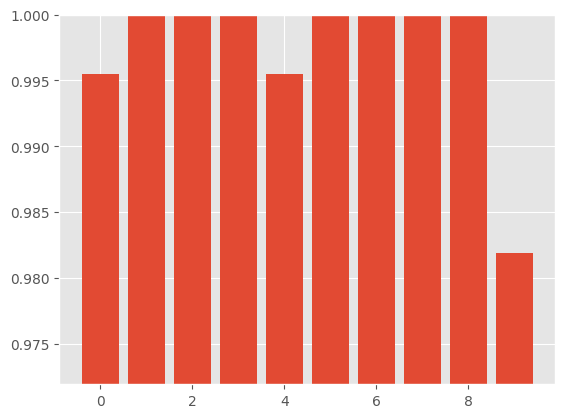

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
#select cross validation
cv = StratifiedKFold(n_splits=10) # this was changed 
# select evaluation criteria
my_scorer = make_scorer(recall_score) # this was changed
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not?



Yes it does. Because recall_score metric measures performance in not predicting false negatives. For our case, it is crucial to decrease false negatives. Higher recall means lower false negatives. 
 


___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, fix the code below so that there are no longer any errors in the cross validation.


*Explain any cross validation errors here (double click to edit)*

* The reason behind the lower performance was that we were using only the first PCA component which wasn't giving us enough explained variance. Therefore, just by increasing the number of PCA components to 2, we were able to increase the performance comparable levels to where we used training set without dimensional reduction. 

(0.9719004524886877, 1.0)

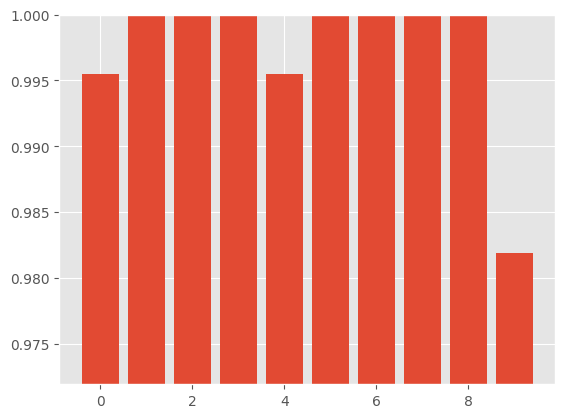

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#n_components is changed
n_components = 2
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X)

clf = Pipeline([('scl',StandardScaler()),
                ('clf',LogisticRegression())])
# our score is recall score
my_scorer = make_scorer(recall_score) 

cv = StratifiedKFold(n_splits=10)

per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=Xpca,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

# =====fixed code======
# The reason behind the lower performance was that we were 
# using only the first PCA component which wasn't giving us 
# enough explained variance. Therefore, just by increasing 
# the number of PCA components to 2, we were able to increase 
# the performance comparable levels to where we used training 
# set without dimensional reduction.

# We used Stratified KFold with K=10. It means that it uses 10% test size.


___

# Circumstances Change
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained because new attacks will emerge.
 - DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
 - DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks. However, they tell you that the amount of training data for the new attacks will be extremely small. That is, the analysts can only identify a handful of new style attacks each day (so you will only have about 3-5 examples of the attacks for training).
- **DARPA asks you: Do you think its a good idea to employ retraining your model each day to find these new attacks?** They need an answer in the next 20 minutes.  

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA when there are only 3-5 attack examples available for training? *Note: you do not have access to these new training examples. You need to change you cross validation method with the existing data to answer this question.* 

*Enter your answer here (double click)*

* We have to find a balance between the precision and variance. In this case, we should be very careful not to identify false negatives. 

* We can increase the cost of false negatives to be very high. This might reduce the overall accuracy and increase false positives however, we could be eliminating the risk of missing the abnormal logins.
___

In [18]:
#plotting function for use in next question
# takes input 'test_scores', axis labels, and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and the output (please rerun with your evaluation criteria), then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why? *Note: the x-axis really is a percentage, so the value 0.1 is actually 0.1%.*

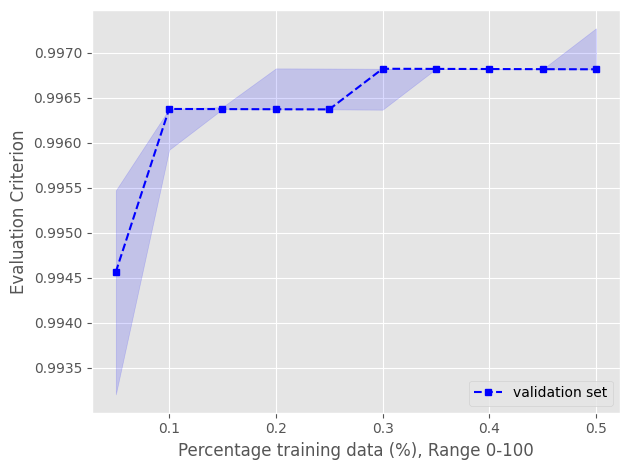

In [20]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

my_scorer = make_scorer(recall_score)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%), Range 0-100')

___
*Enter you answer here (double click)*

* It seems that we plateau when we reach 0.1% train_size treshold and we don't gain much more beyond that point. At 0.05% we are at 99.45% recall_score and when we increase our size above 0.1%, we reach and plateau around 99.65 and that's a rather high score of accuracy. There we would need 0.1% of these data in our dataset when we do train the model. 

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [21]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals


___

Option B should be selected since we use Stratified Shuffle Split. We make more than one model with different data (we shuffle the data). This makes option A not applicable for our case. 

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [22]:
#===================================================
# Enter your code below
def statistical_test(ev1, ev2, ev3):
    t = 2.26 / np.sqrt(10)

    e1 = (1 - ev1) - (1 - ev2)
    e2 = (1 - ev1) - (1 - ev3)
    e3 = (1 - ev2) - (1 - ev3)
    
    stdtot = np.std(e1 + e2 + e3)
    dbar = np.mean(e1 + e2 + e3)

    print('Range of:', dbar - t*stdtot,dbar+t*stdtot, 'difference: ',2*t*stdtot)
    return dbar - t*stdtot, dbar+t*stdtot, dbar
    #print('Model ??? has statistically the best XXX with 95% confidence')
#===================================================

#===================================================
# Enter your code below
def statistical_test_2(ev1, ev2):
    t = 2.26 / np.sqrt(10)

    e1 = (1 - ev1) - (1 - ev2)
    
    stdtot = np.std(e1)
    dbar = np.mean(e1)

    print('Range of:', dbar - t*stdtot,dbar+t*stdtot, 'difference: ',2*t*stdtot)
    return dbar - t*stdtot, dbar+t*stdtot, dbar
    #print('Model ??? has statistically the best XXX with 95% confidence')
#===================================================
"""The errors are of the validations are as follows"""
print(f"for evals1 >>\n mean error: {np.mean(1-evals1)} ")
print(f"for evals2 >>\n mean error: {np.mean(1-evals2)} ")
print(f"for evals3 >>\n mean error: {np.mean(1-evals3)} ")
score1 = statistical_test(evals1, evals2, evals3)
score2 = statistical_test_2(evals1, evals2)
score2 = statistical_test_2(evals1, evals3)
score2 = statistical_test_2(evals2, evals3)

for evals1 >>
 mean error: 0.0027247956403270157 
for evals2 >>
 mean error: 0.0033151680290644968 
for evals3 >>
 mean error: 0.007039055404178018 
Range of: -0.009293663668410522 -0.007963375386993488 difference:  0.0013302882814170346
Range of: -0.0007391031400834967 -0.0004416416373914658 difference:  0.00029746150269203096
Range of: -0.004646831834205261 -0.003981687693496744 difference:  0.0006651441407085173
Range of: -0.004102382751561883 -0.0033453919986651598 difference:  0.000756990752896723


There is no 0 in the given interval. This means these models are distinguishable and one of them is better than the other two. 

Text(0.5, 1.0, 'Recall Performance of the Given Models')

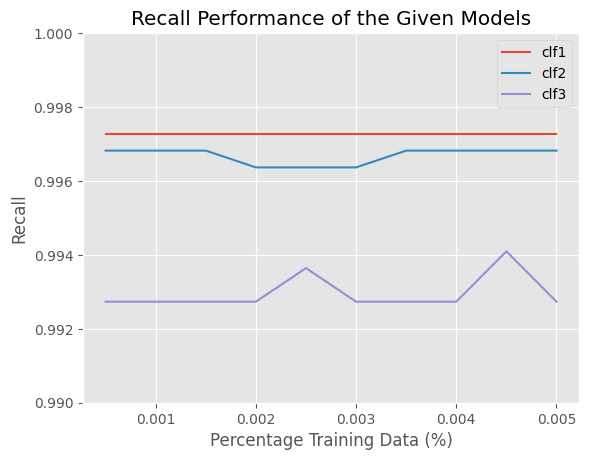

In [23]:
plt.plot(train_sizes, evals1, label="clf1")
plt.plot(train_sizes, evals2, label="clf2")
plt.plot(train_sizes, evals3, label="clf3")
plt.ylim([0.99, 1])
plt.legend(loc="upper right")
plt.xlabel("Percentage Training Data (%)")
plt.ylabel("Recall")
plt.title("Recall Performance of the Given Models")